# This is the notebook for the python pandas dataframe course
### The idea of this notebook is to show the power of working with pandas dataframes

## Motivation

We usually work with tabular data

We should not handle them with bash commands like: for, split, grep, awk, etc...

And **pandas is a very nice tool** to handle this kind of data.

**Welcome to Pandas!**

## Definition of pandas:

Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. 

It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. 

Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.

More information about pandas: <http://pandas.pydata.org/pandas-docs/stable/>

## Contents of the course:

- Know your data
  - Dimensionality: Series or DataFrame
  - Index
  - Some examples
  - Exercise: Selecting pandas structure
         
- I/O:
   - Reading: CSV, FITS, SQL
   - Writing: CSV
   - Advanced example: Reading and writing CSV files by chunks
   
- Selecting and slicing:
    - *loc.* & *iloc.*
    - Advanced example: Estimate a galaxy property for a subset of galaxies using boolean conditions
    - Exercise: Estimate another galaxy property

- Merge, join, and concatenate
    - Exercise: Generate a random catalog using the *concat* method
    - Exercise: Merging dataframes using the *merge* method

- More functions:
    - Loop a dataframe (itertuples and iterows)
    - Sample
    - Reshape: pivot, stack, unstack, etc.

- Summary

- Caveats and technicalities:
    - Floating point limitations
    - .values
    - FITS chunks
    - Copy or view -- Modification - Update
    - CosmoHub files
    - etc    

### Some useful information

- Ten minutes to pandas:

<https://pandas.pydata.org/pandas-docs/stable/10min.html>

- Pandas cookbook:

<https://pandas.pydata.org/pandas-docs/stable/cookbook.html>

- Nice pandas course:

<https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#gs.=B6Dr74>

- Multidimensional dataframes, xarray: 

<http://xarray.pydata.org/en/stable/>

- Tips & Tricks

<https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/>

## Know your data

Very important to (perfectly) know your data: structure, data type, index, relation, etc. (see Pau's talk for a much better explanation ;)

### Dimensionality:
    - 1-D: Series; e.g.
        - Solar planets: [Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]
        - Set of astronomical objects and when they were observed:
            [[NGC1952, 2012-05-01],
             [NGC224, 2013-01-23],
             [NGC5194, 2014-02-13]]
    - 2-D: DataFrame; e.g (more business oriented):
        - 3 months of sales information for 3 fictitious companies:
            sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
                     {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
                     {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]

### Index
- It is the value (~key) we use as a reference for each element. (Note: It does not have to be unique)

- Most of the data contain at least one index

In [1]:
# Import libraries
import pandas as pd
import numpy as np

### Series definition
Series is a one-dimensional labeled array capable of holding any data type

The axis labels are collectively referred to as the index

This is the basic idea of how to create a Series dataframe:

**s = pd.Series(data, index=index)**

where data can be:
- list
- ndarray
- python dictionary
- scalar
and index is a list of axis labels

#### Create a Series array from a list
If no index is passed, one will be created having values [0, ..., len(data) - 1]

In [2]:
solar_planets = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']

In [3]:
splanets = pd.Series(solar_planets)

In [4]:
# Tips and tricks
# To access the Docstring for quick reference on syntax use ? before:
?pd.Series()

In [5]:
splanets

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
dtype: object

In [6]:
splanets.index

RangeIndex(start=0, stop=8, step=1)

#### Create a Series array from a numpy array
If data is an ndarray, index must be the same length as data. 
If no index is passed, one will be created having values [0, ..., len(data) - 1]

- Not including index:

In [7]:
s1 = pd.Series(np.random.randn(5))

In [8]:
s1

0    1.086106
1   -0.730995
2   -1.617960
3    0.554416
4    0.125170
dtype: float64

In [9]:
s1.index

RangeIndex(start=0, stop=5, step=1)

- Including index

In [10]:
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [11]:
s2

a    0.448924
b    0.033132
c    0.321501
d   -1.064799
e    0.207761
dtype: float64

In [12]:
s2.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

- From scalar value

If data is a scalar value, an index must be provided

The value will be repeated to match the length of index

In [13]:
s3 = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

In [14]:
s3

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [15]:
s3.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

#### Create a Series array from a python dictionary

In [16]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

In [17]:
sd = pd.Series(d)

In [18]:
sd

a    0.0
b    1.0
c    2.0
dtype: float64

### DataFrame definition

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types (see also Panel - 3-dimensional array).

You can think of it **like a spreadsheet or SQL table, or a dict of Series objects**. 

It is generally the most commonly used pandas object. 

Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

#### From a list of dictionaries

In [19]:
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
                 {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
                 {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]

In [20]:
df = pd.DataFrame(sales)

In [21]:
df

,Feb,Jan,Mar,account
0,200,150,140,Jones LLC
1,210,200,215,Alpha Co
2,90,50,95,Blue Inc


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
Feb        3 non-null int64
Jan        3 non-null int64
Mar        3 non-null int64
account    3 non-null object
dtypes: int64(3), object(1)
memory usage: 168.0+ bytes


In [23]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [24]:
df = df.set_index('account')

In [25]:
df

,Feb,Jan,Mar
account,,,
Jones LLC,200,150,140
Alpha Co,210,200,215
Blue Inc,90,50,95


#### From dict of Series or dicts

In [26]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [27]:
df = pd.DataFrame(d)

In [28]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
one    3 non-null float64
two    4 non-null float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [30]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [31]:
df.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [32]:
df.columns

Index([u'one', u'two'], dtype='object')

#### From dict of ndarrays / lists
The ndarrays must all be the same length. 

If an index is passed, it must clearly also be the same length as the arrays. 

If no index is passed, the result will be range(n), where n is the array length.

In [33]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}

In [34]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [35]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### From structured or record array
The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. 

If no index is passed, the result will be range(n), where n is the array length.

In [36]:
data = np.random.random_sample((5, 5))

In [37]:
data

array([[ 0.78838047,  0.76556285,  0.17941127,  0.50181887,  0.17299356],
       [ 0.5223585 ,  0.2213054 ,  0.88997229,  0.07578457,  0.4195762 ],
       [ 0.03710839,  0.12739582,  0.52025464,  0.61362577,  0.36711487],
       [ 0.09108031,  0.04125313,  0.89085971,  0.34186093,  0.95406072],
       [ 0.75769268,  0.15504632,  0.52393376,  0.27274215,  0.80742867]])

In [38]:
df = pd.DataFrame(data)

In [39]:
df

,0,1,2,3,4
0,0.788380,0.765563,0.179411,0.501819,0.172994
1,0.522358,0.221305,0.889972,0.075785,0.419576
2,0.037108,0.127396,0.520255,0.613626,0.367115
3,0.091080,0.041253,0.890860,0.341861,0.954061
4,0.757693,0.155046,0.523934,0.272742,0.807429


In [40]:
# Add index
df = pd.DataFrame(data,index = ['a','b','c','d','e'])

In [41]:
df

,0,1,2,3,4
a,0.788380,0.765563,0.179411,0.501819,0.172994
b,0.522358,0.221305,0.889972,0.075785,0.419576
c,0.037108,0.127396,0.520255,0.613626,0.367115
d,0.091080,0.041253,0.890860,0.341861,0.954061
e,0.757693,0.155046,0.523934,0.272742,0.807429


In [42]:
# Add column names
df = pd.DataFrame(data, index = ['a','b','c','d','e'], columns = ['ra', 'dec','z_phot','z_true','imag'])

In [43]:
df

,ra,dec,z_phot,z_true,imag
a,0.788380,0.765563,0.179411,0.501819,0.172994
b,0.522358,0.221305,0.889972,0.075785,0.419576
c,0.037108,0.127396,0.520255,0.613626,0.367115
d,0.091080,0.041253,0.890860,0.341861,0.954061
e,0.757693,0.155046,0.523934,0.272742,0.807429


#### From a list of dicts

In [44]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [45]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [46]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [47]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


### Exercise:
Given a few galaxies with some properties ['id', 'ra', 'dec', 'magi'], choose which pandas structure to use and its index:

In [48]:
#Few galaxies with some properties: id, ra, dec, magi
galaxies = [
    {'id' : 1, 'ra' : 4.5, 'dec' : -55.6, 'magi' : 21.3},
    {'id' : 3, 'ra' : 23.5, 'dec' : 23.6, 'magi' : 23.3},
    {'id' : 25, 'ra' : 22.5, 'dec' : -0.3, 'magi' : 20.8},
    {'id' : 17, 'ra' : 33.5, 'dec' : 15.6, 'magi' : 24.3}   
]

In [49]:
df_galaxies = pd.DataFrame.from_records(galaxies, index = 'id')
df_galaxies

,dec,magi,ra
id,,,
1,-55.6,21.3,4.5
3,23.6,23.3,23.5
25,-0.3,20.8,22.5
17,15.6,24.3,33.5


In [50]:
df_galaxies = pd.DataFrame(galaxies)

In [51]:
df_galaxies

,dec,id,magi,ra
0,-55.6,1,21.3,4.5
1,23.6,3,23.3,23.5
2,-0.3,25,20.8,22.5
3,15.6,17,24.3,33.5


In [52]:
df_galaxies = df_galaxies.set_index('id')

In [53]:
df_galaxies

,dec,magi,ra
id,,,
1,-55.6,21.3,4.5
3,23.6,23.3,23.5
25,-0.3,20.8,22.5
17,15.6,24.3,33.5


### Reading from different sources into a DataFrame
- Most of the times any study starts with an **input file** containing some data rather than having a python list or dictionary.

- Here we present three different data sources and how to read them: two file formats (**CSV** and **FITS**) and a **database** connection.

- **Advanced**: More and more frequently the amount of data to handle is larger and larger (Big Data era) and therefore files are huge. This is why we strongly recommend to always program by chunks (sometimes it is mandatory and also it is not straight forward to implement).

#### FORGET ABOUT FOTRAN!
#### FORGET ABOUT FPRINTF AND FSCANF!

; )

#### - From a CSV (Comma Separated Value) file:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>

#### Reading the full catalog at once (if the file is not very large)

- CSV file created using the following query:
```
SELECT `unique_gal_id`, `unique_halo_id`, `ra_gal`, `dec_gal`, `z_cgal_v`, `z_cgal`, `vxgal`, `vygal`, `vzgal`, `flag_central`, `lmhalo`, `nsats`, `mr_gal`, `gr_gal`, `sed_cos`, `metallicity`, `des_asahi_full_g_true`, `des_asahi_full_r_true`, `des_asahi_full_i_true`, `des_asahi_full_z_true`, `logf_halpha_ext` FROM micecatv2_0_view TABLESAMPLE (BUCKET 1 OUT OF 256)
```

In [240]:
filename = '/nfs/astro/jcarrete/sandbox/curso_python/1203.csv'

- CSV.BZ2 (less storage, slower when reading because of decompression)

In [241]:
filename_bz2 = '/nfs/astro/jcarrete/sandbox/curso_python/1203.csv.bz2'

#### Reading the full catalog at once (if the file is not very large)

In [242]:
# Field index name (known a priori from the header or the file description)
unique_gal_id_field = 'unique_gal_id'

In [243]:
galaxy_sample = pd.read_csv(filename, sep=',', index_col = unique_gal_id_field, comment='#', na_values = '\N')

In [244]:
galaxy_sample.head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
28581888,6813671,6.322946,25.820680,0.30894,0.30917,-944.0,106.0,-126.0,1,13.5638,217,-18.8790,0.8683,1.49,9.204,22.708,21.427,21.002,20.795,-16.372
6513920,583531,31.918837,63.028902,0.21009,0.20998,-191.0,171.0,10.0,0,11.5184,3,-19.1841,0.4690,26.30,8.738,20.562,19.997,19.780,19.608,-14.172
28066816,6705885,2.814453,31.387212,0.28243,0.28162,-325.0,127.0,184.0,0,11.8192,3,-19.7774,0.6869,30.91,8.699,21.248,20.235,19.855,19.578,-14.408
31695360,7690292,11.170244,52.128139,0.53018,0.52944,88.0,35.0,143.0,0,12.1493,5,-20.4820,0.9445,10.57,9.051,23.285,21.732,20.991,20.590,-15.789
20980480,4143780,5.683928,60.137498,0.35974,0.36004,-223.0,69.0,-103.0,1,11.4320,2,-16.2978,0.4299,45.26,8.343,24.508,24.086,24.031,23.968,-15.527


In [245]:
galaxy_sample.tail()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
47809280,15205147,1.024356,1.931872,0.70159,0.70140,-123.0,30.0,169.0,1,13.2645,18,-17.1730,0.7115,46.43,8.274,25.736,25.289,24.884,24.731,-15.550
72990720,26787145,34.863831,2.792849,0.19544,0.19577,-307.0,101.0,212.0,1,12.4254,18,-16.0736,0.7664,21.62,8.998,23.656,22.946,22.730,22.575,-15.765
86145792,30639081,29.612805,45.073359,0.38299,0.38400,577.0,-518.0,-145.0,1,13.0326,53,-19.3365,0.9404,10.60,8.516,23.386,21.737,21.140,20.835,-15.955
72612608,26740864,34.613242,1.958016,0.19149,0.19050,-574.0,710.0,-293.0,1,11.8458,5,-18.7526,0.8544,2.87,8.697,21.303,20.241,19.880,19.655,-16.246
63993856,23935435,68.025492,34.740194,0.20466,0.20558,-438.0,858.0,-277.0,1,13.8767,411,-14.1441,0.3934,29.72,8.090,25.380,24.973,24.780,24.628,-15.869


- DataFrame.describe:

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [246]:
galaxy_sample.describe()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
count,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06,1.951650e+06
mean,1.348529e+08,4.500048e+01,3.359174e+01,7.137574e-01,7.137281e-01,3.264504e+00,-4.565623e+00,2.119610e+00,3.418164e-01,1.175509e+01,3.145021e+01,-1.824804e+01,5.841298e-01,3.200667e+01,8.695910e+00,2.447747e+01,2.394322e+01,2.357304e+01,2.332859e+01,-1.543428e+01
std,9.760982e+07,2.566301e+01,2.161286e+01,3.448367e-01,3.448003e-01,2.887854e+02,2.881546e+02,2.929048e+02,4.743185e-01,8.488723e-01,2.102387e+02,1.733005e+00,2.276400e-01,1.054150e+01,3.439774e-01,1.139399e+00,1.197318e+00,1.215486e+00,1.227938e+00,5.098724e-01
min,2.581500e+04,-2.700000e+02,-5.120000e-04,6.651000e-02,7.296000e-02,-3.065000e+03,-3.709000e+03,-3.739000e+03,0.000000e+00,1.007700e+01,0.000000e+00,-2.305450e+01,-2.055000e-01,-5.000000e-01,6.201000e+00,1.553900e+01,1.450300e+01,1.410700e+01,1.375200e+01,-1.845200e+01
25%,4.988769e+07,2.307810e+01,1.530943e+01,4.282200e-01,4.282900e-01,-1.730000e+02,-1.800000e+02,-1.770000e+02,0.000000e+00,1.115810e+01,0.000000e+00,-1.952870e+01,4.030000e-01,2.486000e+01,8.529000e+00,2.394700e+01,2.342000e+01,2.299300e+01,2.272500e+01,-1.573100e+01
50%,1.163143e+08,4.503421e+01,3.126076e+01,7.005700e-01,7.005900e-01,3.000000e+00,-4.000000e+00,2.000000e+00,0.000000e+00,1.156260e+01,1.000000e+00,-1.850650e+01,5.484000e-01,3.013000e+01,8.768000e+00,2.467100e+01,2.427300e+01,2.391800e+01,2.362500e+01,-1.541700e+01
75%,2.152302e+08,6.687627e+01,4.973144e+01,9.796400e-01,9.795700e-01,1.800000e+02,1.710000e+02,1.820000e+02,1.000000e+00,1.220590e+01,4.000000e+00,-1.718910e+01,7.890000e-01,4.221000e+01,8.937000e+00,2.522900e+01,2.478500e+01,2.447000e+01,2.424200e+01,-1.510900e+01
max,3.318269e+08,9.000000e+01,8.987007e+01,1.425110e+00,1.417080e+00,3.919000e+03,3.022000e+03,3.652000e+03,1.000000e+00,1.526830e+01,1.038500e+04,-1.299840e+01,1.346700e+00,4.650000e+01,9.759000e+00,2.883000e+01,2.649200e+01,2.499900e+01,2.512200e+01,-1.277600e+01


In [247]:
galaxy_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951650 entries, 28581888 to 63993856
Data columns (total 20 columns):
unique_halo_id           int64
ra_gal                   float64
dec_gal                  float64
z_cgal_v                 float64
z_cgal                   float64
vxgal                    float64
vygal                    float64
vzgal                    float64
flag_central             int64
lmhalo                   float64
nsats                    int64
mr_gal                   float64
gr_gal                   float64
sed_cos                  float64
metallicity              float64
des_asahi_full_g_true    float64
des_asahi_full_r_true    float64
des_asahi_full_i_true    float64
des_asahi_full_z_true    float64
logf_halpha_ext          float64
dtypes: float64(17), int64(3)
memory usage: 312.7 MB


In [248]:
galaxy_sample_bz2 = pd.read_csv(filename_bz2, sep=',', index_col = unique_gal_id_field, comment='#', na_values = '\N')

In [63]:
galaxy_sample_bz2.head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
28581888,6813671,6.322946,25.820680,0.30894,0.30917,-944.0,106.0,-126.0,1,13.5638,217,-18.8790,0.8683,1.49,9.204,22.708,21.427,21.002,20.795,-16.372
6513920,583531,31.918837,63.028902,0.21009,0.20998,-191.0,171.0,10.0,0,11.5184,3,-19.1841,0.4690,26.30,8.738,20.562,19.997,19.780,19.608,-14.172
28066816,6705885,2.814453,31.387212,0.28243,0.28162,-325.0,127.0,184.0,0,11.8192,3,-19.7774,0.6869,30.91,8.699,21.248,20.235,19.855,19.578,-14.408
31695360,7690292,11.170244,52.128139,0.53018,0.52944,88.0,35.0,143.0,0,12.1493,5,-20.4820,0.9445,10.57,9.051,23.285,21.732,20.991,20.590,-15.789
20980480,4143780,5.683928,60.137498,0.35974,0.36004,-223.0,69.0,-103.0,1,11.4320,2,-16.2978,0.4299,45.26,8.343,24.508,24.086,24.031,23.968,-15.527


#### [FITS file](https://fits.gsfc.nasa.gov/):

- Pandas does not read directly FITS files so it is necessary to make some "convertion"

- We have found 2 different approaches:
 - [Table](http://docs.astropy.org/en/stable/io/fits/usage/table.html) method from astropy [pyfits](https://pythonhosted.org/pyfits/)
 - fitsio (see "Caveats and technicalities" section below)

- Not easy to read it by chunks (see also "Caveats and technicalities" section below)

- Note: we strongly recommend to use CSV.BZ2!

#### Using astropy (or pyfits)

- This method does not support "by chunks" and therefore you have to read it all at once

In [250]:
from astropy.table import Table

FITS file created using the same query as the CSV file:
``` 
SELECT `unique_gal_id`, `unique_halo_id`, `ra_gal`, `dec_gal`, `z_cgal_v`, `z_cgal`, `vxgal`, `vygal`, `vzgal`, `flag_central`, `lmhalo`, `nsats`, `mr_gal`, `gr_gal`, `sed_cos`, `metallicity`, `des_asahi_full_g_true`, `des_asahi_full_r_true`, `des_asahi_full_i_true`, `des_asahi_full_z_true`, `logf_halpha_ext` FROM micecatv2_0_view TABLESAMPLE (BUCKET 1 OUT OF 256)
```

In [251]:
filename = '/nfs/astro/jcarrete/sandbox/curso_python/1205.fits'

In [252]:
#?Table.read()

In [253]:
data = Table.read(filename)

In [254]:
type(data)

astropy.table.table.Table

In [255]:
df = data.to_pandas()

In [256]:
df.head()

,unique_gal_id,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,...,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
0,244758784,112325853,72.523910,56.679344,1.33412,1.33596,-160.0,-227.0,-139.0,0,...,0,-19.831100,0.3665,45.150002,8.826,24.177999,24.048000,24.028000,23.679001,-15.038
1,240024064,109652573,83.130765,51.886039,1.23614,1.23616,-220.0,-36.0,171.0,0,...,0,-19.933399,0.5635,41.070000,9.302,24.416000,24.280001,24.097000,23.438000,-15.337
2,238642688,108797736,80.228331,38.759545,0.81996,0.82127,-334.0,239.0,16.0,0,...,0,-19.417200,0.5389,28.459999,8.913,23.792999,23.555000,22.983000,22.868000,-15.027
3,244315136,112008889,72.866419,48.212783,1.12479,1.12840,-471.0,40.0,-293.0,1,...,4,-18.857800,0.8112,45.779999,8.819,25.923000,25.257000,24.898001,24.395000,-15.184
4,238639360,108796187,79.762140,38.834107,0.81580,0.81729,-760.0,423.0,442.0,1,...,1,-17.753599,0.8610,22.120001,8.660,26.025999,25.570999,24.780001,24.552000,-16.226


In [257]:
df = df.set_index('unique_gal_id')

In [259]:
df.head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
244758784,112325853,72.523910,56.679344,1.33412,1.33596,-160.0,-227.0,-139.0,0,11.8079,0,-19.831100,0.3665,45.150002,8.826,24.177999,24.048000,24.028000,23.679001,-15.038
240024064,109652573,83.130765,51.886039,1.23614,1.23616,-220.0,-36.0,171.0,0,11.8553,0,-19.933399,0.5635,41.070000,9.302,24.416000,24.280001,24.097000,23.438000,-15.337
238642688,108797736,80.228331,38.759545,0.81996,0.82127,-334.0,239.0,16.0,0,11.6094,0,-19.417200,0.5389,28.459999,8.913,23.792999,23.555000,22.983000,22.868000,-15.027
244315136,112008889,72.866419,48.212783,1.12479,1.12840,-471.0,40.0,-293.0,1,12.5804,4,-18.857800,0.8112,45.779999,8.819,25.923000,25.257000,24.898001,24.395000,-15.184
238639360,108796187,79.762140,38.834107,0.81580,0.81729,-760.0,423.0,442.0,1,11.7356,1,-17.753599,0.8610,22.120001,8.660,26.025999,25.570999,24.780001,24.552000,-16.226


In [260]:
df.shape

(1951650, 20)

In [261]:
df.values.dtype

dtype('<f8')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951650 entries, 244758784 to 63993856
Data columns (total 20 columns):
unique_halo_id           int64
ra_gal                   float64
dec_gal                  float64
z_cgal_v                 float64
z_cgal                   float64
vxgal                    float32
vygal                    float32
vzgal                    float32
flag_central             int32
lmhalo                   float32
nsats                    int32
mr_gal                   float32
gr_gal                   float32
sed_cos                  float32
metallicity              float32
des_asahi_full_g_true    float32
des_asahi_full_r_true    float32
des_asahi_full_i_true    float32
des_asahi_full_z_true    float32
logf_halpha_ext          float32
dtypes: float32(13), float64(4), int32(2), int64(1)
memory usage: 201.0 MB


#### - From Database:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html

In [76]:
# For PostgreSQL access
from sqlalchemy.engine import create_engine
# Text wrapping
import textwrap

In [275]:
# Database configuration parameters
#db_url = '{scheme}://{user}:{password}@{host}/{database}'
db_url = 'sqlite:////nfs/astro/jcarrete/sandbox/curso_python/pandas.sqlite'

sql_sample = textwrap.dedent("""\
SELECT *
FROM micecatv1
WHERE ABS(ra_mag-ra) > 0.05
""")

index_col = 'id'

In [276]:
# Create database connection
engine = create_engine(db_url)
df = pd.read_sql(sql_sample, engine,index_col = 'id')

In [277]:
df.head()

,ra,dec,ra_mag,dec_mag
id,,,,
12127906,29.710205,81.697731,29.830847,81.685196
12127907,29.94643,81.650085,30.069408,81.637154
12127908,28.911779,81.660011,29.037128,81.647942
12127909,29.008251,81.665115,29.130402,81.65284
12127910,28.810217,81.616325,28.933874,81.604515


#### Write to csv file:

In [273]:
outfile = '/nfs/astro/jcarrete/sandbox/curso_python/micecatv1_sample1.csv'

In [274]:
with open(outfile, 'w') as f_out:
    df.to_csv(f_out,
              columns = ['ra', 'dec','ra_mag','dec_mag'],
              index=True,
              header=True
             )

#### Advanced example: Reading and writing by chunks

In [216]:
filename = '/nfs/astro/jcarrete/sandbox/curso_python/1203.csv'
outfile = '/nfs/astro/jcarrete/sandbox/curso_python/1023_some_columns.csv'

In [217]:
# chunk size
gal_chunk = 300000

In [218]:
# Field index name (known a priori from the header or the file description)
unique_gal_id_field = 'unique_gal_id'

- Opening file with the *with* method

- Creating a file object using [read_csv](<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>) method

- Looping by chunks using enumerate in order to also have the chunk number

In [219]:
with open(filename, 'r') as galaxy_fd, open (outfile, 'w') as f_out:
    galaxy_sample_reader = pd.read_csv(
        galaxy_fd, 
        sep=',', 
        index_col = unique_gal_id_field, 
        comment='#', 
        na_values = '\N', 
        chunksize=gal_chunk
    )
    for chunk, block in enumerate(galaxy_sample_reader):
        print chunk
        # In order not to write n chunk times the header (HELP PAU!)
        block.to_csv(f_out, 
            columns = ['ra_gal','dec_gal','z_cgal_v'], 
            index=True, 
            header= chunk==0, 
            mode='a'
       )

0
1
2
3
4
5
6


In [86]:
block.head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
218764032,96846802,59.788717,51.396742,1.10909,1.10875,-341.0,3.0,297.0,0,11.5340,0,-19.2259,0.5329,30.04,8.813,24.623,24.455,24.206,23.827,-15.066
265773824,125197434,80.104005,35.679136,1.08360,1.08294,-36.0,274.0,146.0,0,11.4380,0,-18.9564,0.6943,46.12,9.043,24.878,24.564,24.319,24.000,-15.098
263707392,123966391,89.653565,21.189685,0.95537,0.95646,-184.0,88.0,13.0,0,12.1655,1,-20.4576,0.7495,35.58,8.996,23.815,23.370,22.675,22.315,-14.813
219265536,97192465,55.697559,3.908250,0.63187,0.63230,-227.0,201.0,-76.0,0,11.8257,2,-19.8914,0.8780,22.76,9.128,23.383,22.502,21.950,21.732,-15.070
230516736,103668936,42.171417,40.309906,1.23585,1.23273,66.0,349.0,289.0,1,11.6166,2,-18.5868,0.5271,30.07,8.541,24.921,24.932,24.935,24.586,-15.408


In [87]:
block.tail(3)

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
86145792,30639081,29.612805,45.073359,0.38299,0.38400,577.0,-518.0,-145.0,1,13.0326,53,-19.3365,0.9404,10.60,8.516,23.386,21.737,21.14,20.835,-15.955
72612608,26740864,34.613242,1.958016,0.19149,0.19050,-574.0,710.0,-293.0,1,11.8458,5,-18.7526,0.8544,2.87,8.697,21.303,20.241,19.88,19.655,-16.246
63993856,23935435,68.025492,34.740194,0.20466,0.20558,-438.0,858.0,-277.0,1,13.8767,411,-14.1441,0.3934,29.72,8.090,25.380,24.973,24.78,24.628,-15.869


- DataFrame *plot* method (just for curiosity!)

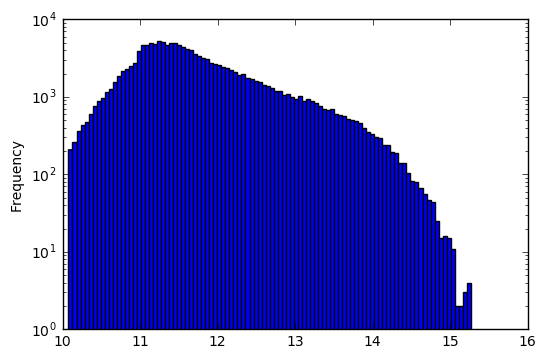

In [88]:
# DataFrame plot method
%matplotlib inline
import matplotlib.pyplot as plt
block['lmhalo'].plot.hist(bins=100, logy = True)
plt.show()

### SELECTING AND SLICING

- The idea of this section is to show how to slice and get and set subsets of pandas objects

- The basics of indexing are as follows:

| Operation                      | Syntax           | Result        |
|--------------------------------|------------------|---------------|
| Select column                  | df[column label] | Series        |
| Select row by index            | df.loc[index]    | Series        |
| Select row by integer location | df.iloc[pos]     | Series        |
| Slice rows                     | df[5:10]         | DataFrame     |
| Select rows by boolean vector  | df[bool_vec]     | DataFrame     |

In [89]:
# Same dataframe as before
filename='/nfs/astro/jcarrete/sandbox/curso_python/1203.csv.bz2'
galaxy_sample = pd.read_csv(filename, sep=',', index_col = unique_gal_id_field, comment='#', na_values = '\N')

In [90]:
galaxy_sample.head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
28581888,6813671,6.322946,25.820680,0.30894,0.30917,-944.0,106.0,-126.0,1,13.5638,217,-18.8790,0.8683,1.49,9.204,22.708,21.427,21.002,20.795,-16.372
6513920,583531,31.918837,63.028902,0.21009,0.20998,-191.0,171.0,10.0,0,11.5184,3,-19.1841,0.4690,26.30,8.738,20.562,19.997,19.780,19.608,-14.172
28066816,6705885,2.814453,31.387212,0.28243,0.28162,-325.0,127.0,184.0,0,11.8192,3,-19.7774,0.6869,30.91,8.699,21.248,20.235,19.855,19.578,-14.408
31695360,7690292,11.170244,52.128139,0.53018,0.52944,88.0,35.0,143.0,0,12.1493,5,-20.4820,0.9445,10.57,9.051,23.285,21.732,20.991,20.590,-15.789
20980480,4143780,5.683928,60.137498,0.35974,0.36004,-223.0,69.0,-103.0,1,11.4320,2,-16.2978,0.4299,45.26,8.343,24.508,24.086,24.031,23.968,-15.527


- Select a column

In [91]:
galaxy_sample['ra_gal'].head()

unique_gal_id
28581888     6.322946
6513920     31.918837
28066816     2.814453
31695360    11.170244
20980480     5.683928
Name: ra_gal, dtype: float64

In [92]:
type(galaxy_sample['dec_gal'])

pandas.core.series.Series

In [93]:
galaxy_sample[['ra_gal','dec_gal','lmhalo']].head()

,ra_gal,dec_gal,lmhalo
unique_gal_id,,,
28581888,6.322946,25.820680,13.5638
6513920,31.918837,63.028902,11.5184
28066816,2.814453,31.387212,11.8192
31695360,11.170244,52.128139,12.1493
20980480,5.683928,60.137498,11.4320


- Select a row by index

In [94]:
galaxy_sample.loc[28581888]

unique_halo_id           6.813671e+06
ra_gal                   6.322946e+00
dec_gal                  2.582068e+01
z_cgal_v                 3.089400e-01
z_cgal                   3.091700e-01
vxgal                   -9.440000e+02
vygal                    1.060000e+02
vzgal                   -1.260000e+02
flag_central             1.000000e+00
lmhalo                   1.356380e+01
nsats                    2.170000e+02
mr_gal                  -1.887900e+01
gr_gal                   8.683000e-01
sed_cos                  1.490000e+00
metallicity              9.204000e+00
des_asahi_full_g_true    2.270800e+01
des_asahi_full_r_true    2.142700e+01
des_asahi_full_i_true    2.100200e+01
des_asahi_full_z_true    2.079500e+01
logf_halpha_ext         -1.637200e+01
Name: 28581888, dtype: float64

In [95]:
type(galaxy_sample.loc[28581888])

pandas.core.series.Series

- Select a row by integer location

In [96]:
galaxy_sample.iloc[0]

unique_halo_id           6.813671e+06
ra_gal                   6.322946e+00
dec_gal                  2.582068e+01
z_cgal_v                 3.089400e-01
z_cgal                   3.091700e-01
vxgal                   -9.440000e+02
vygal                    1.060000e+02
vzgal                   -1.260000e+02
flag_central             1.000000e+00
lmhalo                   1.356380e+01
nsats                    2.170000e+02
mr_gal                  -1.887900e+01
gr_gal                   8.683000e-01
sed_cos                  1.490000e+00
metallicity              9.204000e+00
des_asahi_full_g_true    2.270800e+01
des_asahi_full_r_true    2.142700e+01
des_asahi_full_i_true    2.100200e+01
des_asahi_full_z_true    2.079500e+01
logf_halpha_ext         -1.637200e+01
Name: 28581888, dtype: float64

In [97]:
type(galaxy_sample.iloc[0])

pandas.core.series.Series

- Slice rows

In [98]:
galaxy_sample.iloc[3:7]

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
31695360,7690292,11.170244,52.128139,0.53018,0.52944,88.0,35.0,143.0,0,12.1493,5,-20.4820,0.9445,10.57,9.051,23.285,21.732,20.991,20.590,-15.789
20980480,4143780,5.683928,60.137498,0.35974,0.36004,-223.0,69.0,-103.0,1,11.4320,2,-16.2978,0.4299,45.26,8.343,24.508,24.086,24.031,23.968,-15.527
17727232,3557072,15.329197,21.370674,0.22878,0.22906,-5.0,9.0,-212.0,0,12.4103,26,-20.8905,0.8485,10.51,8.936,19.812,18.611,18.175,17.919,-14.908
9050624,1004890,15.515433,73.343966,0.32613,0.32986,64.0,-242.0,-815.0,1,12.1488,9,-18.1710,0.3122,45.99,8.603,22.458,22.050,21.939,21.839,-14.564


In [99]:
galaxy_sample[3:7]

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
31695360,7690292,11.170244,52.128139,0.53018,0.52944,88.0,35.0,143.0,0,12.1493,5,-20.4820,0.9445,10.57,9.051,23.285,21.732,20.991,20.590,-15.789
20980480,4143780,5.683928,60.137498,0.35974,0.36004,-223.0,69.0,-103.0,1,11.4320,2,-16.2978,0.4299,45.26,8.343,24.508,24.086,24.031,23.968,-15.527
17727232,3557072,15.329197,21.370674,0.22878,0.22906,-5.0,9.0,-212.0,0,12.4103,26,-20.8905,0.8485,10.51,8.936,19.812,18.611,18.175,17.919,-14.908
9050624,1004890,15.515433,73.343966,0.32613,0.32986,64.0,-242.0,-815.0,1,12.1488,9,-18.1710,0.3122,45.99,8.603,22.458,22.050,21.939,21.839,-14.564


In [100]:
type(galaxy_sample.iloc[3:7])

pandas.core.frame.DataFrame

- Select rows by boolean vector: 

The operators are: | for or, & for and, and ~ for not. These must be grouped by using parentheses.

In [101]:
# Boolean vector
(galaxy_sample['ra_gal'] < 45).tail()

unique_gal_id
47809280     True
72990720     True
86145792     True
72612608     True
63993856    False
Name: ra_gal, dtype: bool

In [102]:
type(galaxy_sample['ra_gal'] < 45)

pandas.core.series.Series

In [103]:
galaxy_sample[galaxy_sample['ra_gal'] < 45].head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
28581888,6813671,6.322946,25.820680,0.30894,0.30917,-944.0,106.0,-126.0,1,13.5638,217,-18.8790,0.8683,1.49,9.204,22.708,21.427,21.002,20.795,-16.372
6513920,583531,31.918837,63.028902,0.21009,0.20998,-191.0,171.0,10.0,0,11.5184,3,-19.1841,0.4690,26.30,8.738,20.562,19.997,19.780,19.608,-14.172
28066816,6705885,2.814453,31.387212,0.28243,0.28162,-325.0,127.0,184.0,0,11.8192,3,-19.7774,0.6869,30.91,8.699,21.248,20.235,19.855,19.578,-14.408
31695360,7690292,11.170244,52.128139,0.53018,0.52944,88.0,35.0,143.0,0,12.1493,5,-20.4820,0.9445,10.57,9.051,23.285,21.732,20.991,20.590,-15.789
20980480,4143780,5.683928,60.137498,0.35974,0.36004,-223.0,69.0,-103.0,1,11.4320,2,-16.2978,0.4299,45.26,8.343,24.508,24.086,24.031,23.968,-15.527


In [104]:
# redshift shell
galaxy_sample[(galaxy_sample.z_cgal <= 0.2) | (galaxy_sample.z_cgal >= 1.0)].head()

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
5670656,491819,77.520009,67.003535,0.17039,0.16942,543.0,157.0,30.0,1,11.6772,1,-17.0436,0.8849,12.01,8.358,22.667,21.651,21.280,20.991,-16.024
2320896,192012,44.974395,19.339001,0.11212,0.11159,138.0,140.0,-129.0,1,11.8812,4,-15.1444,0.4212,22.15,8.268,22.902,22.529,22.396,22.286,-15.680
13615360,2778894,25.933329,84.993563,1.09291,1.09288,-19.0,328.0,-21.0,1,12.2438,2,-19.9832,0.9017,15.68,8.912,26.237,25.238,24.430,23.534,-15.939
6063872,534415,58.001313,63.696729,0.19219,0.19561,-81.0,-412.0,-817.0,1,11.8853,4,-15.2035,0.3650,43.06,8.092,24.171,23.785,23.644,23.529,-15.652
3231232,268116,45.789139,52.770253,0.11941,0.12072,-115.0,-307.0,-217.0,1,12.2684,13,-20.0788,0.9073,4.76,8.926,18.716,17.754,17.400,17.143,-15.472


In [105]:
galaxy_sample[(galaxy_sample.z_cgal <= 1.0) & (galaxy_sample.index.isin([5670656,13615360,3231232]))]

,unique_halo_id,ra_gal,dec_gal,z_cgal_v,z_cgal,vxgal,vygal,vzgal,flag_central,lmhalo,nsats,mr_gal,gr_gal,sed_cos,metallicity,des_asahi_full_g_true,des_asahi_full_r_true,des_asahi_full_i_true,des_asahi_full_z_true,logf_halpha_ext
unique_gal_id,,,,,,,,,,,,,,,,,,,,
5670656,491819,77.520009,67.003535,0.17039,0.16942,543.0,157.0,30.0,1,11.6772,1,-17.0436,0.8849,12.01,8.358,22.667,21.651,21.28,20.991,-16.024
3231232,268116,45.789139,52.770253,0.11941,0.12072,-115.0,-307.0,-217.0,1,12.2684,13,-20.0788,0.9073,4.76,8.926,18.716,17.754,17.40,17.143,-15.472


In [106]:
galaxy_sample[(galaxy_sample['ra_gal'] < 1.) & (galaxy_sample['dec_gal'] < 1.)][['ra_gal','dec_gal']].head()

,ra_gal,dec_gal
unique_gal_id,,
60252160,0.506340,0.603683
443736576,0.656398,0.543388
58349312,0.450907,0.022658
325529600,0.511039,0.443529
443926528,0.322707,0.102679


### Recap:
- loc works on labels in the index.
- iloc works on the positions in the index (so it only takes integers).

### Advanced example: estimate the size of the disk (*disk_length*) for a set of galaxies

- In this exercise we are going to use some of the previous examples. 
- Also we are going to introduce how to add a column and some other concepts

    - We split the galaxies into two different populations, Ellipticals and Spirals, depending on the their color and absolute magnitude:
        ```
         if color - 0.29 + 0.03 * abs_mag < 0 then Spiral
         else then Elliptical
        ```

    - How many galaxies are elliptical or spirals?

    - Elliptical galaxies do not have any disk (and therefore disk_length = 0).

    - The disk_length for spiral galaxies follows a normal distribution with mean = 0 and sigma = 0.15 (in arcsec). In addition, the minimum disk_length for a spiral galaxy is 1.e-3.

In [107]:
filename='/nfs/astro/jcarrete/sandbox/curso_python/1329.csv'
'''
SELECT unique_gal_id, 
(mr_gal - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS abs_mag, 
gr_gal AS color, 
(des_asahi_full_i_true - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS app_mag 
FROM micecatv2_0_view 
LIMIT 1000

catalog 1329
'''

unique_gal_id_field = 'unique_gal_id'
galaxy_sample = pd.read_csv(
        filename, 
        sep=',', 
        index_col = unique_gal_id_field, 
        comment='#', 
        na_values = '\N', 
    )

In [108]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag
unique_gal_id,,,
266930432,-21.720871,0.7693,21.178329
244782592,-20.564829,0.3700,23.249573
225208064,-17.888000,0.3709,24.266699
261874432,-20.711691,0.6040,23.875210
260952576,-20.162808,0.8380,23.574893
222255360,-19.983145,0.8812,23.232855
232096256,-19.743302,0.9105,23.679798
260299520,-20.217747,0.6072,23.329051
247799296,-19.684737,0.4154,23.648262


In [109]:
# Splitting the galaxies
# Boolean mask
has_disk_mask = (galaxy_sample['color']-0.29+0.03*galaxy_sample['abs_mag'] < 0)

In [110]:
has_disk_mask.tail(10)

unique_gal_id
266930432     True
244782592     True
225208064     True
261874432     True
260952576     True
222255360     True
232096256    False
260299520     True
247799296     True
215520768     True
dtype: bool

In [111]:
print len(has_disk_mask)
print type(has_disk_mask)

1000
<class 'pandas.core.series.Series'>


In [112]:
# Counting how many spirals
n_spiral = has_disk_mask.sum()

In [113]:
# Counting how many ellipticals
n_elliptical = ~has_disk_mask.sum()

In [114]:
galaxy_sample[has_disk_mask].count()

abs_mag    885
color      885
app_mag    885
dtype: int64

In [115]:
galaxy_sample[has_disk_mask]['hubble_type'] = 'Spiral'

/software/astro/env/jcarrete/hod_new/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [116]:
# It did not 
galaxy_sample.tail(10)

,abs_mag,color,app_mag
unique_gal_id,,,
266930432,-21.720871,0.7693,21.178329
244782592,-20.564829,0.3700,23.249573
225208064,-17.888000,0.3709,24.266699
261874432,-20.711691,0.6040,23.875210
260952576,-20.162808,0.8380,23.574893
222255360,-19.983145,0.8812,23.232855
232096256,-19.743302,0.9105,23.679798
260299520,-20.217747,0.6072,23.329051
247799296,-19.684737,0.4154,23.648262


In [117]:
galaxy_sample.loc[has_disk_mask, 'hubble_type'] = 'Spiral'

In [118]:
galaxy_sample.loc[~has_disk_mask, 'hubble_type'] = 'Elliptical'

In [119]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag,hubble_type
unique_gal_id,,,,
266930432,-21.720871,0.7693,21.178329,Spiral
244782592,-20.564829,0.3700,23.249573,Spiral
225208064,-17.888000,0.3709,24.266699,Spiral
261874432,-20.711691,0.6040,23.875210,Spiral
260952576,-20.162808,0.8380,23.574893,Spiral
222255360,-19.983145,0.8812,23.232855,Spiral
232096256,-19.743302,0.9105,23.679798,Elliptical
260299520,-20.217747,0.6072,23.329051,Spiral
247799296,-19.684737,0.4154,23.648262,Spiral


In [120]:
# We can use the numpy where method to do the same:
galaxy_sample['color_type'] = np.where(has_disk_mask, 'Blue', 'Red')

In [121]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag,hubble_type,color_type
unique_gal_id,,,,,
266930432,-21.720871,0.7693,21.178329,Spiral,Blue
244782592,-20.564829,0.3700,23.249573,Spiral,Blue
225208064,-17.888000,0.3709,24.266699,Spiral,Blue
261874432,-20.711691,0.6040,23.875210,Spiral,Blue
260952576,-20.162808,0.8380,23.574893,Spiral,Blue
222255360,-19.983145,0.8812,23.232855,Spiral,Blue
232096256,-19.743302,0.9105,23.679798,Elliptical,Red
260299520,-20.217747,0.6072,23.329051,Spiral,Blue
247799296,-19.684737,0.4154,23.648262,Spiral,Blue


In [122]:
# The proper way would be to use a boolean field
galaxy_sample['has_disk'] = has_disk_mask

In [123]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag,hubble_type,color_type,has_disk
unique_gal_id,,,,,,
266930432,-21.720871,0.7693,21.178329,Spiral,Blue,True
244782592,-20.564829,0.3700,23.249573,Spiral,Blue,True
225208064,-17.888000,0.3709,24.266699,Spiral,Blue,True
261874432,-20.711691,0.6040,23.875210,Spiral,Blue,True
260952576,-20.162808,0.8380,23.574893,Spiral,Blue,True
222255360,-19.983145,0.8812,23.232855,Spiral,Blue,True
232096256,-19.743302,0.9105,23.679798,Elliptical,Red,False
260299520,-20.217747,0.6072,23.329051,Spiral,Blue,True
247799296,-19.684737,0.4154,23.648262,Spiral,Blue,True


In [124]:
galaxy_sample.loc[~has_disk_mask, 'disk_length'] = 0.

In [125]:
galaxy_sample.loc[has_disk_mask, 'disk_length'] = np.fabs(
                np.random.normal(
                    0., scale=0.15, size=n_spiral
                )
            )

## DO NOT LOOP THE PANDAS DATAFRAME IN GENERAL!

In [126]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag,hubble_type,color_type,has_disk,disk_length
unique_gal_id,,,,,,,
266930432,-21.720871,0.7693,21.178329,Spiral,Blue,True,0.237745
244782592,-20.564829,0.3700,23.249573,Spiral,Blue,True,0.039123
225208064,-17.888000,0.3709,24.266699,Spiral,Blue,True,0.161822
261874432,-20.711691,0.6040,23.875210,Spiral,Blue,True,0.065723
260952576,-20.162808,0.8380,23.574893,Spiral,Blue,True,0.058081
222255360,-19.983145,0.8812,23.232855,Spiral,Blue,True,0.044193
232096256,-19.743302,0.9105,23.679798,Elliptical,Red,False,0.000000
260299520,-20.217747,0.6072,23.329051,Spiral,Blue,True,0.333363
247799296,-19.684737,0.4154,23.648262,Spiral,Blue,True,0.066834


In [127]:
# Minimum value for disk_length for spirals
dl_min = 1.e-3;

In [128]:
disk_too_small_mask = has_disk_mask & (galaxy_sample['disk_length'] < dl_min)

In [129]:
disk_too_small_mask.sum()

4

In [130]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length']

unique_gal_id
402759680    0.000198
457504512    0.000544
427512832    0.000403
349400064    0.000195
Name: disk_length, dtype: float64

In [131]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'] = dl_min

In [132]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length']

unique_gal_id
402759680    0.001
457504512    0.001
427512832    0.001
349400064    0.001
Name: disk_length, dtype: float64

In [133]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag,hubble_type,color_type,has_disk,disk_length
unique_gal_id,,,,,,,
266930432,-21.720871,0.7693,21.178329,Spiral,Blue,True,0.237745
244782592,-20.564829,0.3700,23.249573,Spiral,Blue,True,0.039123
225208064,-17.888000,0.3709,24.266699,Spiral,Blue,True,0.161822
261874432,-20.711691,0.6040,23.875210,Spiral,Blue,True,0.065723
260952576,-20.162808,0.8380,23.574893,Spiral,Blue,True,0.058081
222255360,-19.983145,0.8812,23.232855,Spiral,Blue,True,0.044193
232096256,-19.743302,0.9105,23.679798,Elliptical,Red,False,0.000000
260299520,-20.217747,0.6072,23.329051,Spiral,Blue,True,0.333363
247799296,-19.684737,0.4154,23.648262,Spiral,Blue,True,0.066834


### Exercise:

- What is the mean value and the standard deviation of the *disk_length* for spiral galaxies (Tip: use the .mean() and .std() methods)

- Estimate the bulge_length for elliptical galaxies. The bulge_length depends on the absolute magnitude in the following way:
    
    bulge_length = exp(-1.145 - 0.269 * (abs_mag - 23.))
    
- How many galaxies have bulge_lenth > 0.5.?  

- In our model the maximum bulge_length for an elliptical galaxy is 0.5 arcsec.

- What is the mean value and the standard deviation of the *bulge_length* for elliptical galaxies. And for ellipticals with absolute magnitude brighter than -20?

In [134]:
mean_dl = galaxy_sample[has_disk_mask]['disk_length'].mean()
std_dl = galaxy_sample[has_disk_mask]['disk_length'].std()
print mean_dl, std_dl

0.119067363788 0.0867744263148


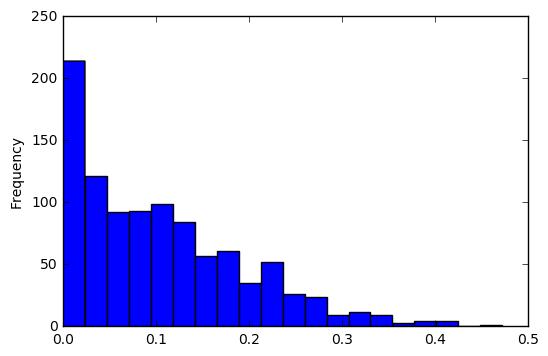

In [135]:
# FULL POPULATION
galaxy_sample['disk_length'].plot.hist(bins=20)#, logy = True)
plt.show()

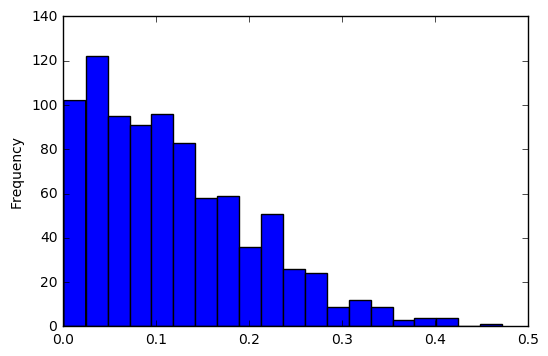

In [136]:
# SPIRAL GALAXIES
galaxy_sample[has_disk_mask]['disk_length'].plot.hist(bins=20)#, logy = True)
plt.show()

In [137]:
# bulge_length for Spiral galaxies = 0
galaxy_sample.loc[has_disk_mask,'bulge_length'] = 0

In [138]:
# bulge_length for elliptical galaxies
def bulge_length(mag):
    return np.exp(
        -1.145 - 0.269 * (mag - 23.)
    )

In [139]:
# bulge_length for Spiral galaxies = 0
galaxy_sample.loc[~has_disk_mask,'bulge_length'] = bulge_length(galaxy_sample['app_mag'])

In [140]:
galaxy_sample.tail(10)

,abs_mag,color,app_mag,hubble_type,color_type,has_disk,disk_length,bulge_length
unique_gal_id,,,,,,,,
266930432,-21.720871,0.7693,21.178329,Spiral,Blue,True,0.237745,0.000000
244782592,-20.564829,0.3700,23.249573,Spiral,Blue,True,0.039123,0.000000
225208064,-17.888000,0.3709,24.266699,Spiral,Blue,True,0.161822,0.000000
261874432,-20.711691,0.6040,23.875210,Spiral,Blue,True,0.065723,0.000000
260952576,-20.162808,0.8380,23.574893,Spiral,Blue,True,0.058081,0.000000
222255360,-19.983145,0.8812,23.232855,Spiral,Blue,True,0.044193,0.000000
232096256,-19.743302,0.9105,23.679798,Elliptical,Red,False,0.000000,0.265042
260299520,-20.217747,0.6072,23.329051,Spiral,Blue,True,0.333363,0.000000
247799296,-19.684737,0.4154,23.648262,Spiral,Blue,True,0.066834,0.000000


In [141]:
bl_max = 0.5

In [142]:
bulge_too_large_mask = ~has_disk_mask & (galaxy_sample['bulge_length'] > bl_max)

In [143]:
bulge_too_large_mask.sum()

5

In [144]:
galaxy_sample.loc[bulge_too_large_mask, 'bulge_length']

unique_gal_id
334592256    0.642113
329875968    0.586669
310129408    0.539356
310029568    0.641196
215653888    0.576941
Name: bulge_length, dtype: float64

In [145]:
galaxy_sample.loc[bulge_too_large_mask, 'bulge_length'] = bl_max

In [146]:
galaxy_sample.loc[bulge_too_large_mask, 'bulge_length']

unique_gal_id
334592256    0.5
329875968    0.5
310129408    0.5
310029568    0.5
215653888    0.5
Name: bulge_length, dtype: float64

In [147]:
mean_bl = galaxy_sample[~has_disk_mask]['bulge_length'].mean()
std_bl = galaxy_sample[~has_disk_mask]['bulge_length'].std()
print mean_bl, std_bl

0.300451356126 0.0676609250028


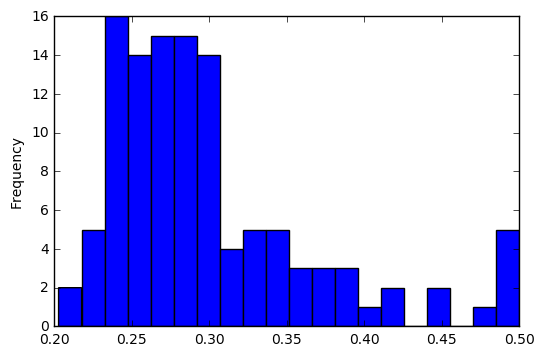

In [148]:
# SPIRAL GALAXIES
galaxy_sample[~has_disk_mask]['bulge_length'].plot.hist(bins=20)#, logy = True)
plt.show()

In [149]:
bulge_and_bright_mask = ~has_disk_mask & (galaxy_sample['abs_mag'] < -21.0)

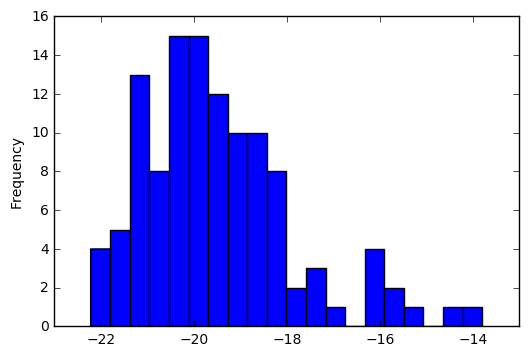

In [150]:
galaxy_sample[~has_disk_mask]['abs_mag'].plot.hist(bins=20)#, logy = True)
plt.show()

In [151]:
mean_bl = galaxy_sample[bulge_and_bright_mask]['bulge_length'].mean()
std_bl = galaxy_sample[bulge_and_bright_mask]['bulge_length'].std()
print mean_bl, std_bl

0.320771168963 0.0699171877075


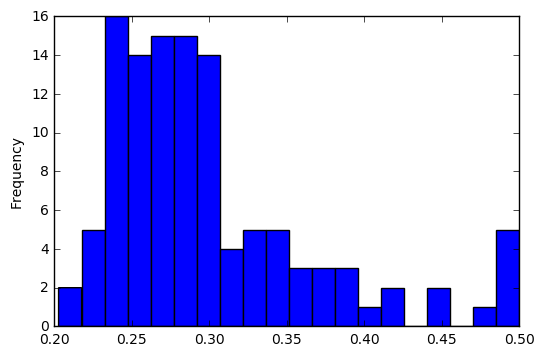

In [152]:
# SPIRAL GALAXIES
galaxy_sample[~has_disk_mask]['bulge_length'].plot.hist(bins=20)#, logy = True)
plt.show()

### Merge, join, and concatenate

<https://pandas.pydata.org/pandas-docs/stable/merging.html>

- pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

- *concat* method:
```
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

In [153]:
df1 = pd.DataFrame(
    {'A': ['A0', 'A1', 'A2', 'A3'],
     'B': ['B0', 'B1', 'B2', 'B3'],
     'C': ['C0', 'C1', 'C2', 'C3'],
     'D': ['D0', 'D1', 'D2', 'D3']},
    index=[0, 1, 2, 3]
)

In [154]:
df2 = pd.DataFrame(
    {'A': ['A4', 'A5', 'A6', 'A7'],
     'B': ['B4', 'B5', 'B6', 'B7'],
     'C': ['C4', 'C5', 'C6', 'C7'],
     'D': ['D4', 'D5', 'D6', 'D7']},
    index=[4, 5, 6, 7]
) 

In [155]:
df3 = pd.DataFrame(
    {'A': ['A8', 'A9', 'A10', 'A11'],
     'B': ['B8', 'B9', 'B10', 'B11'],
     'C': ['C8', 'C9', 'C10', 'C11'],
     'D': ['D8', 'D9', 'D10', 'D11']},
    index=[8, 9, 10, 11]
)

In [156]:
frames = [df1, df2, df3]

In [157]:
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [158]:
# Multiindex
result = pd.concat(frames, keys=['x', 'y','z'])

In [159]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [160]:
result.index

MultiIndex(levels=[[u'x', u'y', u'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [161]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [162]:
df4 = pd.DataFrame(
    {'B': ['B2', 'B3', 'B6', 'B7'],
     'D': ['D2', 'D3', 'D6', 'D7'],
     'F': ['F2', 'F3', 'F6', 'F7']},
    index=[2, 3, 6, 7]
)

In [163]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [164]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [165]:
result = pd.concat([df1, df4])
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [166]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [167]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


- Using *append* method:

In [168]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [169]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [170]:
result = df1.append(df2)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [171]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [172]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [173]:
result = df1.append(df4)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [174]:
result = pd.concat([df1,df4])
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- Note: Unlike list.append method, which appends to the original list and returns nothing, append here does not modify df1 and returns its copy with df2 appended.

In [175]:
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- This is also a valid argument to DataFrame.append:

In [176]:
result = df1.append(df4, ignore_index = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- Mixing dimensions

In [177]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [178]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [179]:
result = pd.concat([s1,df1])
result

,0,A,B,C,D
0,X0,NaN,NaN,NaN,NaN
1,X1,NaN,NaN,NaN,NaN
2,X2,NaN,NaN,NaN,NaN
3,X3,NaN,NaN,NaN,NaN
0,NaN,A0,B0,C0,D0
1,NaN,A1,B1,C1,D1
2,NaN,A2,B2,C2,D2
3,NaN,A3,B3,C3,D3


In [180]:
result = pd.concat([df1,s1], axis = 1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [181]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])

In [182]:
result = pd.concat([df1,s2,s2,s2], axis = 1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


### Example: Generate a random catalog using concat method

- In this exercise we will use the concat method and show a basic example of multiIndex.

- Given a subset of 3 galaxies with the following properties ['halo_id', 'gal_id' ,'ra', 'dec', 'z', 'abs_mag'], create a random catalog with 50 times more galaxies than the subset keeping the properties of the galaxies but placing them randomly in the first octant of the sky. 

- The index of each galaxy is given by the tuple [halo_id, gal_id]

In [183]:
data =  [
    # halo_id, gal_id, ra, dec, z, abs_mag'
    [1, 1, 21.5, 30.1, 0.21, -21.2],
    [1, 2, 21.6, 29.0, 0.21, -18.3],
    [1, 3, 21.4, 30.0, 0.21, -18.5],
    [2, 1, 45.0, 45.0, 0.42, -20.4],
    [3, 1, 25.0, 33.1, 0.61, -21.2],
    [3, 2, 25.1, 33.2, 0.61, -20.3]
]

nrandom = 50

In [184]:
galaxies = pd.DataFrame(data, columns=['halo_id', 'gal_id', 'ra', 'dec', 'z', 'abs_mag'])
galaxies = galaxies.set_index(['halo_id', 'gal_id'])
galaxies

ra   dec     z  abs_mag
halo_id gal_id                           
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5
2       1       45.0  45.0  0.42    -20.4
3       1       25.0  33.1  0.61    -21.2
        2       25.1  33.2  0.61    -20.3

In [185]:
# Easy example of selecting all galaxies from one halo
galaxies.loc[3]

,ra,dec,z,abs_mag
gal_id,,,,
1,25.0,33.1,0.61,-21.2
2,25.1,33.2,0.61,-20.3


In [186]:
galaxies.loc[1]

,ra,dec,z,abs_mag
gal_id,,,,
1,21.5,30.1,0.21,-21.2
2,21.6,29.0,0.21,-18.3
3,21.4,30.0,0.21,-18.5


In [187]:
galaxies.loc[1]['abs_mag'].mean()

-19.333333333333332

In [188]:
random_galaxies = pd.concat([galaxies]*nrandom)
random_galaxies.head(15)

ra   dec     z  abs_mag
halo_id gal_id                           
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5
2       1       45.0  45.0  0.42    -20.4
3       1       25.0  33.1  0.61    -21.2
        2       25.1  33.2  0.61    -20.3
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5
2       1       45.0  45.0  0.42    -20.4
3       1       25.0  33.1  0.61    -21.2
        2       25.1  33.2  0.61    -20.3
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5

In [189]:
random_galaxies = random_galaxies.reset_index()
random_galaxies.head(10)

,halo_id,gal_id,ra,dec,z,abs_mag
0,1,1,21.5,30.1,0.21,-21.2
1,1,2,21.6,29.0,0.21,-18.3
2,1,3,21.4,30.0,0.21,-18.5
3,2,1,45.0,45.0,0.42,-20.4
4,3,1,25.0,33.1,0.61,-21.2
5,3,2,25.1,33.2,0.61,-20.3
6,1,1,21.5,30.1,0.21,-21.2
7,1,2,21.6,29.0,0.21,-18.3
8,1,3,21.4,30.0,0.21,-18.5
9,2,1,45.0,45.0,0.42,-20.4


In [190]:
random_galaxies.index.names = ['random_index']
random_galaxies.head(10)

,halo_id,gal_id,ra,dec,z,abs_mag
random_index,,,,,,
0,1,1,21.5,30.1,0.21,-21.2
1,1,2,21.6,29.0,0.21,-18.3
2,1,3,21.4,30.0,0.21,-18.5
3,2,1,45.0,45.0,0.42,-20.4
4,3,1,25.0,33.1,0.61,-21.2
5,3,2,25.1,33.2,0.61,-20.3
6,1,1,21.5,30.1,0.21,-21.2
7,1,2,21.6,29.0,0.21,-18.3
8,1,3,21.4,30.0,0.21,-18.5


In [191]:
import math
random_galaxies['ra'] = 90.*np.random.random(len(random_galaxies))
random_galaxies['dec'] = (180./math.pi)*np.arccos(np.random.random(len(random_galaxies))-1)-90

In [192]:
random_galaxies.head(10)

,halo_id,gal_id,ra,dec,z,abs_mag
random_index,,,,,,
0,1,1,55.608383,22.468572,0.21,-21.2
1,1,2,60.728969,53.067785,0.21,-18.3
2,1,3,71.130816,21.754623,0.21,-18.5
3,2,1,13.801353,31.508948,0.42,-20.4
4,3,1,78.979044,52.767765,0.61,-21.2
5,3,2,30.806589,80.590357,0.61,-20.3
6,1,1,60.271709,64.294312,0.21,-21.2
7,1,2,37.018288,51.384333,0.21,-18.3
8,1,3,72.493251,54.833739,0.21,-18.5


#### Merge method: Database-style DataFrame joining/merging:

- pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and internal layout of the data in DataFrame

- See the [cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html) for some advanced strategies

- Users who are familiar with SQL but new to pandas might be interested in a [comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join)

```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
```

#### Example: PAU example

- Goal: build a dataframe merging 2 different dataframes with complementary information, through the relation given by a third dataframe.

    - df_stars contains information of stars magnitudes per sdss_star_id and per *filter*:
        - ['sdss_star_id', 'filter', 'expected_mag', 'expected_mag_err']
        - Note, the file is "somehow" corrupted and entries are duplicate several times
        - Unique entries are characterized by *sdss_star_id* and *filter*
    - df_spectra contains information of star *flux* per *band* (== *filter*) and per *spec_id* (!= *sdss_star_id*):
        - ['spec_id', 'band', 'flux', 'flux_err']
        - Unique entries are characterized by *spec_id* and *band*
    - df_spec_IDs allows to make the correspondence between *sdss_star_id* (== *objID*) and *spec_id* (== *specObjID*):
        - ['objID', 'specObjID']
        - Unique entries are characterized by *objID*

In [193]:
star_filename = '/nfs/astro/jcarrete/sandbox/curso_python/df_star.ssv'
spectra_filename = '/nfs/astro/jcarrete/sandbox/curso_python/df_spectra.ssv'
starid_specid_filename = '/nfs/astro/jcarrete/sandbox/curso_python/df_starid_specid.ssv'

In [194]:
# Given that the file is somehow corrupted we open it without defining any index
df_star = pd.read_csv(star_filename, sep=' ')

In [195]:
df_star.head()

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
1,1237651754534174862,NB455,16.0077,0.009613
2,1237651754534174868,NB455,16.4402,0.018096
3,1237653665258995739,NB455,18.0902,0.026920
4,1237653665258995741,NB455,18.1403,0.033415


In [196]:
# We know there are duplicates, e.g:
df_star[(df_star['sdss_star_id'] == 1237653665258930303) & (df_star['filter'] == 'NB455')]

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
14135,1237653665258930303,NB455,14.1185,0.002498
41578,1237653665258930303,NB455,14.1185,0.002498
69366,1237653665258930303,NB455,14.1185,0.002498
76098,1237653665258930303,NB455,14.1185,0.002498
92857,1237653665258930303,NB455,14.1185,0.002498
94740,1237653665258930303,NB455,14.1185,0.002498
102129,1237653665258930303,NB455,14.1185,0.002498


In [197]:
# Drop duplicates:
df_star.drop_duplicates(subset = ['sdss_star_id', 'filter'], inplace= True)

In [198]:
df_star[(df_star['sdss_star_id'] == 1237653665258930303) & (df_star['filter'] == 'NB455')]

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498


In [199]:
df_spectra = pd.read_csv(spectra_filename, index_col=['spec_id', 'band'], sep = ' ')

In [200]:
df_starid_specid = pd.read_csv(starid_specid_filename, sep=' ')

#### NOTE: When sep = ' ' means ONE space, not "several" spaces!

- See bad example in 'Caveats and technicalities' section below

In [201]:
df_star.head(10)

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
1,1237651754534174862,NB455,16.0077,0.009613
2,1237651754534174868,NB455,16.4402,0.018096
3,1237653665258995739,NB455,18.0902,0.026920
4,1237653665258995741,NB455,18.1403,0.033415
5,1237653665258995735,NB455,16.5273,0.019411
6,1237651754534174879,NB455,16.2990,0.021418
7,1237651754534175046,NB455,18.5312,0.018517
8,1237653665258995740,NB455,18.1420,0.013531
9,1237653665258995737,NB455,18.7606,0.018422


In [202]:
df_spectra.head(41)

flux  flux_err
spec_id            band                    
564125093970601984 NB575  118.439   5.82869
                   NB455  139.590   4.68904
                   NB555  131.690   5.15743
                   NB475  117.701   4.35988
                   NB795  153.804  10.49200
                   NB535  115.215   4.52892
                   NB725  166.609   6.41391
                   NB765  148.803   8.70154
                   NB815  159.590   9.24626
                   NB485  112.973   4.42662
                   NB685  193.392   5.02416
                   NB705  154.606   5.02007
                   NB835  193.390  13.89030
                   NB645  133.584   4.41329
                   NB585  123.810   6.51806
                   NB505  124.124   4.26728
                   NB695  159.519   5.38121
                   NB625  142.537   5.04128
                   NB745  140.507   6.48958
                   NB605  130.867   5.19826
                   NB565  130.628   5.44442
                   NB465  146.835   4.58899
                   NB545  111.936   4.69258
                   NB525  110.591   4.36454
                   NB665  151.969   4.31910
                   NB785  166.931  10.25410
                   NB805  153.564   9.49142
                   NB615  137.293   4.74815
                   NB635  133.074   4.73063
                   NB715  166.483   5.05375
                   NB825  160.063  10.96990
                   NB495  112.334   4.30512
                   NB595  122.645   5.97710
                   NB675  200.884   4.21519
                   NB845  191.830  14.44110
                   NB655  140.002   4.60485
                   NB515  110.836   4.26808
                   NB755  140.380   7.14257
                   NB735  156.592   7.43371
                   NB775  164.835   8.71259
564125643726415872 NB575  376.499   6.55297

In [203]:
df_starid_specid.head(5)

,objID,specObjID
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


In [204]:
# We are going to unset the index and rename the columsn in order to use the "on" argument:

In [205]:
df_spectra.reset_index(inplace = True)
df_spectra.head()

,spec_id,band,flux,flux_err
0,564125093970601984,NB575,118.439,5.82869
1,564125093970601984,NB455,139.590,4.68904
2,564125093970601984,NB555,131.690,5.15743
3,564125093970601984,NB475,117.701,4.35988
4,564125093970601984,NB795,153.804,10.49200


In [206]:
df_spectra.rename(columns={'band': 'filter'}, inplace = True)
df_spectra.head()

,spec_id,filter,flux,flux_err
0,564125093970601984,NB575,118.439,5.82869
1,564125093970601984,NB455,139.590,4.68904
2,564125093970601984,NB555,131.690,5.15743
3,564125093970601984,NB475,117.701,4.35988
4,564125093970601984,NB795,153.804,10.49200


In [207]:
df_starid_specid.rename(columns={'objID':'sdss_star_id', 'specObjID':'spec_id'}, inplace = True)
df_starid_specid.head()

,sdss_star_id,spec_id
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


In [208]:
# Now we have everything ready to make the JOINs

In [209]:
df_star_merged = pd.merge(df_star, df_starid_specid, on='sdss_star_id')

In [210]:
df_star_merged.head()

,sdss_star_id,filter,expected_mag,expected_mag_err,spec_id
0,1237653665259061426,NB455,17.0845,0.008731,563122610200668160
1,1237653665259061426,NB475,16.9845,0.008731,563122610200668160
2,1237653665259061426,NB535,16.7995,0.008731,563122610200668160
3,1237653665259061426,NB685,16.5315,0.008731,563122610200668160
4,1237653665259061426,NB655,16.5745,0.008731,563122610200668160


In [211]:
df_star_merged = pd.merge(df_star_merged, df_spectra, on=['spec_id','filter'])

In [212]:
df_star_merged.head(40)

,sdss_star_id,filter,expected_mag,expected_mag_err,spec_id,flux,flux_err
0,1237653665259061426,NB455,17.0845,0.008731,563122610200668160,3449.55,14.09800
1,1237653665259061426,NB475,16.9845,0.008731,563122610200668160,3787.50,14.22110
2,1237653665259061426,NB535,16.7995,0.008731,563122610200668160,4294.29,15.15040
3,1237653665259061426,NB685,16.5315,0.008731,563122610200668160,5159.24,16.80340
4,1237653665259061426,NB655,16.5745,0.008731,563122610200668160,4901.12,15.64510
5,1237653665259061426,NB765,16.4835,0.008731,563122610200668160,5256.04,22.53470
6,1237653665259061426,NB845,16.4475,0.008731,563122610200668160,5224.63,27.16950
7,1237653665259061426,NB545,16.7635,0.008731,563122610200668160,4381.42,15.48150
8,1237653665259061426,NB745,16.4945,0.008731,563122610200668160,5204.17,18.33640
9,1237653665259061426,NB565,16.7105,0.008731,563122610200668160,4548.09,16.60220


In [213]:
df_star_merged.set_index(['sdss_star_id', 'filter'], inplace = True)

In [214]:
df_star_merged.head()

expected_mag  expected_mag_err  \
sdss_star_id        filter                                   
1237653665259061426 NB455        17.0845          0.008731   
                    NB475        16.9845          0.008731   
                    NB535        16.7995          0.008731   
                    NB685        16.5315          0.008731   
                    NB655        16.5745          0.008731   

                                       spec_id     flux  flux_err  
sdss_star_id        filter                                         
1237653665259061426 NB455   563122610200668160  3449.55   14.0980  
                    NB475   563122610200668160  3787.50   14.2211  
                    NB535   563122610200668160  4294.29   15.1504  
                    NB685   563122610200668160  5159.24   16.8034  
                    NB655   563122610200668160  4901.12   15.6451

In [261]:
# Contar cuántas bandas tiene cada objeto:
count_bands = df_star_merged.groupby(level=0)['flux'].count()

In [262]:
count_bands

sdss_star_id
1237648722827870212     5
1237648722827870237     5
1237648722827870367     5
1237648722827870374     3
1237648722827935750     5
1237648722827935861     5
1237648722827935902     5
1237648722827935914     4
1237648722827935919     5
1237648722827935932     4
1237648722828001327    10
1237648722828001339    10
1237648722828001342    10
1237648722828001410     6
1237648722828001419    10
1237648722828066862    10
1237648722828066938    10
1237648722828066958    10
1237648722828132369    10
1237648722828132408    10
1237648722828132435    10
1237648722828132438    10
1237648722828198076    10
1237648722828263440    10
1237648722828263481    10
1237648722828263521    10
1237648722828263523    10
1237648722828263602     6
1237648722828263614    10
1237648722828329092    10
                       ..
1237654604247466078    10
1237654604247466134     3
1237654604247466168    16
1237654604247466172    20
1237654604247531890     7
1237654604247597374    10
1237654604247662638    20

In [234]:
df_star_merged.groupby(level=1)['flux_err'].mean()

filter
NB455     7.725166
NB465     7.935421
NB475     7.720782
NB485     7.795951
NB495     7.964259
NB505     8.040383
NB515     8.438551
NB525     8.940733
NB535     8.088588
NB545     8.619306
NB555     9.083655
NB565     9.613539
NB575    10.318009
NB585    10.342649
NB595    10.308725
NB605     9.807679
NB615    10.619302
NB625    16.008395
NB635    10.317289
NB645    12.569120
NB655     9.659645
NB665     9.435924
NB675    10.929055
NB685    10.279040
NB695    12.367022
NB705    11.891626
NB715    11.338523
NB725    12.615749
NB735    23.549662
NB745    11.983545
NB755    14.055974
NB765    16.201618
NB775    16.564160
NB785    17.578066
NB795    16.955163
NB805    52.108339
NB815    16.590055
NB825    31.830149
NB835    20.219658
NB845    22.697244
Name: flux_err, dtype: float64

### More functions
- Looping a dataframe (iterrows)

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html>

- sample method

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html>

- Reshape dataframes (pivot, stack, unstack):

<http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/>

## Ideas to get home:

- Do not loop a dataframe! (try to find any loop in this notebook!)

- Try to work by chunks; create functions that work with chunks (even vectorize the function if it is not developed to do it)

- Work with standard formats and "already implemented" functions

### Caveats and technicalities

### [Floating point limitations](<https://docs.python.org/2/tutorial/floatingpoint.html>):

- Be careful with exact comparisons!

In [220]:
# e.g.: the decimal value 0.1 cannot be represented exactly as a base 2 fraction
(0.1 + 0.2) == 0.3

False

In [221]:
(0.1 + 0.2) - 0.3

5.551115123125783e-17

### FITS files

- [fitsio](<https://pypi.python.org/pypi/fitsio/>)

- And working by chunks

In [224]:
import fitsio

In [225]:
filename = '/nfs/astro/jcarrete/sandbox/curso_python/1205.fits'

In [226]:
fits=fitsio.FITS(filename)

In [227]:
data = fits[1]

In [231]:
# Number of rows
data.get_nrows()

1951650L

In [232]:
# chunk size
gal_chunk = 1000000

In [233]:
import math

# e.g.to create the ranges!
niter = int(math.ceil(data.get_nrows() / float(gal_chunk)))

for i in xrange(niter):
    s = i*gal_chunk
    f = min((i+1)*gal_chunk, data.get_nrows())
    chunk = data[s:f]
    print i
    print type(chunk)
    print chunk.dtype
    df_chunk = pd.DataFrame(chunk)
    print type(df_chunk)
    print df_chunk.dtypes
    df_chunk = df_chunk.set_index('unique_gal_id')
    print df_chunk.head()

0
<type 'numpy.ndarray'>
[('unique_gal_id', '>i8'), ('unique_halo_id', '>i8'), ('ra_gal', '>f8'), ('dec_gal', '>f8'), ('z_cgal_v', '>f8'), ('z_cgal', '>f8'), ('vxgal', '>f4'), ('vygal', '>f4'), ('vzgal', '>f4'), ('flag_central', '>i4'), ('lmhalo', '>f4'), ('nsats', '>i4'), ('mr_gal', '>f4'), ('gr_gal', '>f4'), ('sed_cos', '>f4'), ('metallicity', '>f4'), ('des_asahi_full_g_true', '>f4'), ('des_asahi_full_r_true', '>f4'), ('des_asahi_full_i_true', '>f4'), ('des_asahi_full_z_true', '>f4'), ('logf_halpha_ext', '>f4')]
<class 'pandas.core.frame.DataFrame'>
unique_gal_id            >i8
unique_halo_id           >i8
ra_gal                   >f8
dec_gal                  >f8
z_cgal_v                 >f8
z_cgal                   >f8
vxgal                    >f4
vygal                    >f4
vzgal                    >f4
flag_central             >i4
lmhalo                   >f4
nsats                    >i4
mr_gal                   >f4
gr_gal                   >f4
sed_cos                  >f4
metalli

#### [.values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) DataFrame attribute 

- Some scipy functions do not allow to use pandas dataframe as arguments and therefore it is useful to use the values atribute, which is the numpy representation of NDFrame

- The dtype will be a lower-common-denominator dtype (implicit upcasting); that is to say if the dtypes (even of numeric types) are mixed, the one that accommodates all will be chosen. Use this with care if you are not dealing with the blocks.

#### View vs. Copy

<https://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy>

#### Wrong input example:
- .dat

- Look at the file using e.g. *head* bash command

- Note that there are more than one space, and if you do *tail filename*, different number of "spaces"

In [235]:
bad_filename = '/nfs/astro/jcarrete/sandbox/curso_python/steps.flagship.dat'

In [236]:
df_bad = pd.read_csv(bad_filename)
df_bad.head()

,400 0.000000000000E+00 3.788230419159E+00 1.894401788712E+00 9.993683695793E-01 6.319999811240E-04
0,399 3.788230419159E+00 1.137576389313E+01 ...
1,398 1.137576389313E+01 1.898096656799E+01 ...
2,397 1.898096656799E+01 2.660372543335E+01 ...
3,396 2.660372543335E+01 3.424393081665E+01 ...
4,395 3.424393081665E+01 4.190146636963E+01 ...


In [237]:
df_bad =  pd.read_csv(bad_filename, sep = ' ')

CParserError: Error tokenizing data. C error: Expected 12 fields in line 302, saw 13


- Necessary to "modify" the file in order to convert it into a standard csv file, e.g.:

```
cat steps.flagship.dat | tr -s " " | sed 's/^ *//g' > steps.flagship.ssv
```

In [300]:
columns = ['step_num', 'r_min', 'r_max', 'r_med', 'a_med', 'z_med']

In [301]:
df = pd.read_csv(filename, sep = ' ', header = None, names = columns, index_col = 'step_num')

In [302]:
df.head()

,r_min,r_max,r_med,a_med,z_med
step_num,,,,,
400,0.000000,3.788230,1.894402,0.999368,0.000632
399,3.788230,11.375764,7.583150,0.997475,0.002531
398,11.375764,18.980967,15.179528,0.994956,0.005069
397,18.980967,26.603725,22.793518,0.992441,0.007617
396,26.603725,34.243931,30.425011,0.989929,0.010173


### Starting reading from a CosmoHub csv.bz2 file (Big Data platform)
- Bzip2 compressed Comma-separated values file (please check Help [#4](https://cosmohub.pic.es/help) if using Pandas DataFrame)

In [128]:
import bz2file
import pandas as pd

catalog_filename='/nfs/astro/jcarrete/sandbox/curso_python/1203.csv.bz2'
#unique_gal_id_field = 'unique_gal_id'

with bz2file.BZ2File(catalog_filename) as galaxy_fd:
    galaxy_sample = pd.read_csv(galaxy_fd, sep=',', index_col = 'unique_gal_id', comment='#', na_values = '\N')